### 1. 문제 정의
- 사내 이직률을 낮춰 다니고 싶은 회사, 떠나기 싫은 회사 이미지를 만들기

### 2. 데이터 수집
- 직원 이직 데이터

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('data/job_transfer.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 3. 데이터 전처리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 4. 탐색적 데이터 분석

In [5]:
# 이직
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [6]:
# 이직 = 0, 이직 x = 1로 수정
import numpy as np
df['Attrition'] = np.where(df['Attrition']=='Yes', 1, 0)
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [7]:
# 성별, 연령 분석
# -> 구간화
np.where(df['Age'] <= 30, '30이하', np.where(df['Age'] <= 40, '30~40대', '40대 이상'))


array(['40대 이상', '40대 이상', '30~40대', ..., '30이하', '40대 이상', '30~40대'],
      dtype='<U6')

In [8]:
df['AgeGroup'] = np.where(df['Age'] <= 30, '30이하', np.where(df['Age'] <= 40, '30~40대', '40대 이상'))

In [9]:
df['AgeGroup'].value_counts()

AgeGroup
30~40대    619
40대 이상    465
30이하      386
Name: count, dtype: int64

In [10]:
# 연령 그룹별 이직률 현황
df_gp = df.groupby('AgeGroup')['Attrition'].agg(['sum', 'count'])
df_gp['rate'] = round((df_gp['sum'] / df_gp['count'])*100,1)
df_gp

,sum,count,rate
AgeGroup,,,
30~40대,85,619,13.7
30이하,100,386,25.9
40대 이상,52,465,11.2


In [11]:
# 성별 이직률 현황
df_gp2 = df.groupby('Gender')['Attrition'].agg(['sum', 'count'])
df_gp2['rate'] = round((df_gp2['sum'] / df_gp2['count'])*100,1)
df_gp2
# 남성 직원의 이직률이 좀 더 높음

,sum,count,rate
Gender,,,
Female,87,588,14.8
Male,150,882,17.0


In [12]:
# 부서별 이직률 현황
df_gp3 = df.groupby('Department')['Attrition'].agg(['sum', 'count'])
df_gp3['rate'] = round((df_gp3['sum'] / df_gp3['count'])*100,1)
df_gp3

,sum,count,rate
Department,,,
Human Resources,12,63,19.0
Research & Development,133,961,13.8
Sales,92,446,20.6


In [13]:
# 인간관계 만족도, 업무 만족도와 이직간의 상관관계 확인해보기
# -> 상관계수
df[['RelationshipSatisfaction', 'JobSatisfaction', 'Attrition']].head()

,RelationshipSatisfaction,JobSatisfaction,Attrition
0,1,4,1
1,4,2,0
2,2,3,1
3,3,3,0
4,4,2,0


In [14]:
# 업무 만족도별 이직률 현황
df_gp4 = df.groupby('JobSatisfaction')['Attrition'].agg(['sum', 'count'])
df_gp4['rate'] = round((df_gp4['sum'] / df_gp4['count'])*100,1)
df_gp4

,sum,count,rate
JobSatisfaction,,,
1,66,289,22.8
2,46,280,16.4
3,73,442,16.5
4,52,459,11.3


In [15]:
# YearsAtCompany : 회사에서 근무한 기간
# YearsInCurrentRole : 현재 직무에서 근무한 기간
df[['YearsAtCompany', 'YearsInCurrentRole']].head()

,YearsAtCompany,YearsInCurrentRole
0,6,4
1,10,7
2,0,0
3,8,7
4,2,2


In [16]:
# 근속년수 대비 한가지 역할을 맡은 연수의 비중
df['Role_Company'] = df['YearsInCurrentRole'] / df['YearsAtCompany']
df['Role_Company'].head()


0    0.666667
1    0.700000
2         NaN
3    0.875000
4    1.000000
Name: Role_Company, dtype: float64

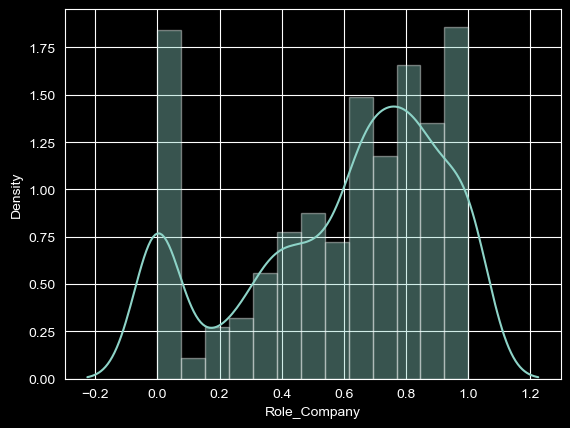

In [17]:
# Role_Company의 분포 확인(그래프)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['dark_background'])
sns.distplot(df['Role_Company'])
plt.show()

In [18]:
# 구간화
#'Role_Company'
#'0.4 이하'
#'0.4~0.8'
#'0.8 초과'

df['Role_Company_Group'] = np.where(df['Role_Company'] <= 0.4, '0.4 이하', np.where(df['Role_Company'] <= 0.8, '0.4~0.8', '0.8 초과'))

In [19]:
df['Role_Company_Group'].value_counts()

Role_Company_Group
0.4~0.8    621
0.8 초과     439
0.4 이하     410
Name: count, dtype: int64

In [20]:
# 근속년수 대비 비율
df_gp5 = df.groupby('Role_Company_Group')['Attrition'].agg(['sum', 'count'])
df_gp5['rate'] = round((df_gp5['sum'] / df_gp5['count'])*100,1)
df_gp5

,sum,count,rate
Role_Company_Group,,,
0.4 이하,87,410,21.2
0.4~0.8,81,621,13.0
0.8 초과,69,439,15.7


In [21]:
df['OverTime']

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

In [22]:
# 야근 여부에 따른 이직률 현황
df_gp6 = df.groupby('OverTime')['Attrition'].agg(['sum', 'count'])
df_gp6['rate'] = round((df_gp6['sum'] / df_gp6['count'])*100,1)
df_gp6

,sum,count,rate
OverTime,,,
No,110,1054,10.4
Yes,127,416,30.5


In [23]:
# PercentSalaryHike : 급여 인상률
df_gp7 = df.groupby(['OverTime','PercentSalaryHike'])['Attrition'].agg(['sum', 'count'])
df_gp7['rate'] = round((df_gp7['sum'] / df_gp7['count'])*100,1)
df_gp7

sum  count  rate
OverTime PercentSalaryHike                  
No       11                  19    149  12.8
         12                  18    139  12.9
         13                  14    144   9.7
         14                   8    145   5.5
         15                  12     80  15.0
         16                   8     55  14.5
         17                   9     66  13.6
         18                   5     60   8.3
         19                   3     55   5.5
         20                   4     40  10.0
         21                   2     36   5.6
         22                   6     41  14.6
         23                   1     19   5.3
         24                   1     12   8.3
         25                   0     13   0.0
Yes      11                  22     61  36.1
         12                  15     59  25.4
         13                  20     65  30.8
         14                  16     56  28.6
         15                   6     21  28.6
         16                   6     23  26.1
         17                   5     16  31.2
         18                   8     29  27.6
         19                   6     21  28.6
         20                   3     15  20.0
         21                   3     12  25.0
         22                   6     15  40.0
         23                   5      9  55.6
         24                   5      9  55.6
         25                   1      5  20.0

In [24]:
df_gp_plot = df_gp7.reset_index()


In [25]:
df_gp_plot = df_gp_plot[df_gp_plot['OverTime']=='Yes']

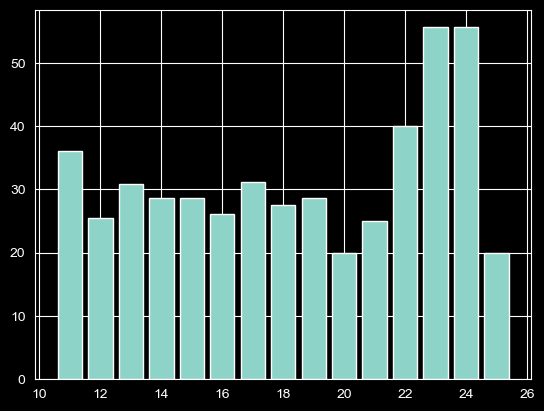

In [26]:
# 야근 Yes 직원 Data 분석
plt.bar(df_gp_plot['PercentSalaryHike'], df_gp_plot['rate'])
plt.show()
# 연봉 20% 상승률 까지 감소하는 추세가 보이지만
# 22% 이상 연봉 상승하는 핵심인재의 경우 이직률이 높다
# 연봉 인상률이 높은 직원의 야근시간을 줄이는 것이 이직을 방지할 방법 중 하나로 보임

### 5. 모델 선택 및 하이퍼파라미터 튜닝
- 데이터 타입별로 구분
- 라벨인코딩
- 데이터 정리
- train, test 분리
- Support Vector Machine Classifier
- Logistic Regression

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [28]:
# 데이터 타입별로 구분
for i in df.columns:
    print(i, df[i].dtypes=='O')


Age False
Attrition False
BusinessTravel True
DailyRate False
Department True
DistanceFromHome False
Education False
EducationField True
EmployeeCount False
EmployeeNumber False
EnvironmentSatisfaction False
Gender True
HourlyRate False
JobInvolvement False
JobLevel False
JobRole True
JobSatisfaction False
MaritalStatus True
MonthlyIncome False
MonthlyRate False
NumCompaniesWorked False
Over18 True
OverTime True
PercentSalaryHike False
PerformanceRating False
RelationshipSatisfaction False
StandardHours False
StockOptionLevel False
TotalWorkingYears False
TrainingTimesLastYear False
WorkLifeBalance False
YearsAtCompany False
YearsInCurrentRole False
YearsSinceLastPromotion False
YearsWithCurrManager False
AgeGroup True
Role_Company False
Role_Company_Group True


In [29]:
# numeric, catergorical value 분리
numeric_list = []
categorical_list = []

for i in df.columns:
    if df[i].dtypes == 'O':
        categorical_list.append(i)
    else:
        numeric_list.append(i)

print('N',numeric_list, 'C',categorical_list)


N ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Role_Company'] C ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'AgeGroup', 'Role_Company_Group']


In [30]:
# 모델 학습을 위한X,y로 데이터 나누기
# 훈련, 평가 데이터로 나누기
X = df.drop(['Attrition','AgeGroup','Role_Company_Group','Role_Company'], axis=1)
y = df['Attrition']

In [31]:
# 훈련, 평가 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 34), (441, 34), (1029,), (441,))

In [33]:
# EDA과정에서 생성한 변수들 제거
categorical_list.remove('AgeGroup')
categorical_list.remove('Role_Company_Group')

In [34]:
categorical_list

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [35]:
# 라벨인코딩
for col in categorical_list:
    le = LabelEncoder()
    le.fit(list(X_train[col].values) + list(X_test[col].values))
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
    

### 6. 학습

### 7.평가

In [39]:
# Support Vector Machine Classifier
svc = SVC(C=1) # 규제 강도(역수), 클수록 규제 약해짐
svc.fit(X_train, y_train) # 학습
y_pred_train = svc.predict(X_train) # 예측
y_pred_test = svc.predict(X_test) # 예측
print('Train 정확도', accuracy_score(y_train, y_pred_train))
print('Test 정확도', accuracy_score(y_test, y_pred_test))
print('Train 평가지표\n', classification_report(y_train, y_pred_train))
print('Test 평가지표\n', classification_report(y_test, y_pred_test))


Train 정확도 0.8386783284742468
Test 정확도 0.8390022675736961
Train 평가지표
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       863
           1       0.00      0.00      0.00       166

    accuracy                           0.84      1029
   macro avg       0.42      0.50      0.46      1029
weighted avg       0.70      0.84      0.77      1029

Test 평가지표
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



In [40]:
# Logistic Regression
lr = LogisticRegression(C=0.1, max_iter=10000) # 모델 생성
lr.fit(X_train, y_train) # 학습

LogisticRegression(C=0.1, max_iter=10000)

In [41]:
y_pred_train = lr.predict(X_train) # 예측
y_pred_test = lr.predict(X_test) # 예측
print('Train 정확도', accuracy_score(y_train, y_pred_train))
print('Test 정확도', accuracy_score(y_test, y_pred_test))
print('Train 평가지표\n', classification_report(y_train, y_pred_train))
print('Test 평가지표\n', classification_report(y_test, y_pred_test))

Train 정확도 0.8736637512147716
Test 정확도 0.8820861678004536
Train 평가지표
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       863
           1       0.80      0.29      0.42       166

    accuracy                           0.87      1029
   macro avg       0.84      0.64      0.68      1029
weighted avg       0.87      0.87      0.85      1029

Test 평가지표
               precision    recall  f1-score   support

           0       0.89      0.99      0.93       370
           1       0.83      0.34      0.48        71

    accuracy                           0.88       441
   macro avg       0.86      0.66      0.71       441
weighted avg       0.88      0.88      0.86       441



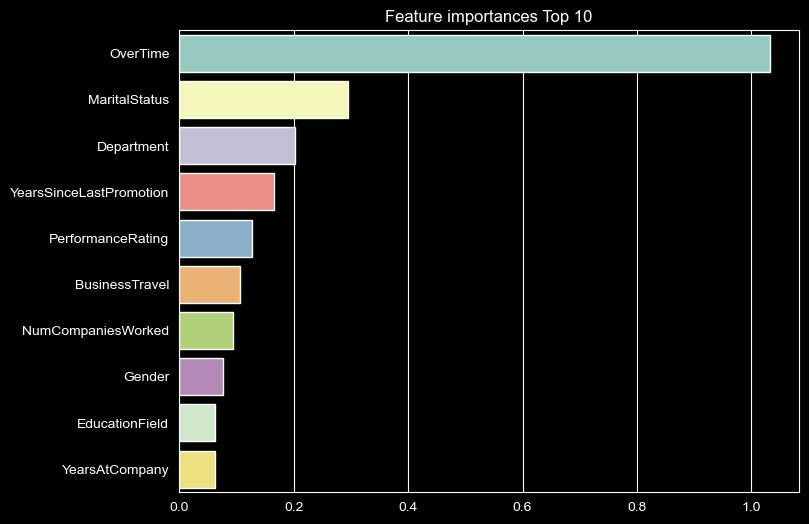

In [61]:
# 모델에 가장 많은 영향을 미치는 변수 탐색
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['dark_background'])
ftr_importances_values = lr.coef_[0]
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10, y=ftr_top10.index)
plt.show()



In [51]:
lr.coef_[0] # 모델 가중치(w)

array([-1.85535125e-02,  1.06507069e-01, -2.04654332e-04,  2.01797678e-01,
        3.00727971e-02, -2.25363289e-03,  6.22197614e-02,  4.03779411e-04,
       -3.44628477e-04, -2.53827184e-01,  7.68406559e-02, -3.13830120e-03,
       -4.91387986e-01, -1.89305544e-02,  2.54551237e-03, -2.36986490e-01,
        2.95666810e-01, -8.88869335e-05,  1.44456454e-05,  9.49454426e-02,
        0.00000000e+00,  1.03158293e+00, -1.91966930e-02,  1.28173998e-01,
       -9.81183926e-02,  3.23023529e-02, -3.20990032e-01, -6.20510538e-02,
       -1.17952441e-01, -1.35127195e-01,  6.20902402e-02, -1.08591384e-01,
        1.66194314e-01, -1.35691030e-01])

In [62]:
# MaritalStatus : 결혼 상태
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [64]:
# MaritalStatus 특성의 직원 수, 이직자 수 확인
df_ma = df.groupby('MaritalStatus')['Attrition'].agg(['sum', 'count'])
df_ma['rate'] = round((df_gp['sum'] / df_gp['count'])*100,1)
df_ma

,sum,count,rate
MaritalStatus,,,
Divorced,33,327,10.1
Married,84,673,12.5
Single,120,470,25.5
